 See readme file for full credits and references.

In [42]:
import numpy as np
import matplotlib.pyplot as plt

In [44]:
# Define function for dice roll
def roll_dice(num_rolls):
    # Generate 'num_rolls' random numbers between 1 and 6
    return np.random.randint(1, 7, num_rolls)

# Function to simulate one 'battle round'
def simulate_battle():
    # Start with 3 attackers and 2 defenders
    attackers, defenders = 3, 2

    # Loop until either attackers or defenders run out 
    while attackers > 0 and defenders > 0:
        # Roll dice for attackers and sort rolls highest to lowest 
        attack_rolls = np.sort(roll_dice(attackers))[::-1]
        # Roll dice for defenders and sort rolls highest to lowest
        defense_rolls = np.sort(roll_dice(defenders))[::-1]
        # Use the smaller number of rolls for comparisons 
        rounds = min(len(attack_rolls), len(defense_rolls))
        # Count how many attackers lose based on the highest rolls by taking the top 2 and comparing them
        attacker_losses = np.sum(attack_rolls[:2] <= defense_rolls[:2])
        # Calculate defender losses 
        defender_losses = rounds - attacker_losses
        # Update the counts of attackers and defenders
        attackers -= attacker_losses
        defenders -= defender_losses

    # Return the losses for attackers and defenders
    return attacker_losses, defender_losses

# Number of battle rounds to simulate
x_repeats = 1000

# Create list to store losses for each round
attacker_losses_list = []
defender_losses_list = []

# Create a lopop to run 'x_repeats' number of battles
for _ in range(x_repeats):
    # Run 'simulate_battle' function and collect results
    attacker_losses, defender_losses = simulate_battle()
    
    # appent to list and store the losses from eachround
    attacker_losses_list.append(attacker_losses)
    defender_losses_list.append(defender_losses)


# Count total losses for attackers and defenders
total_attacker_losses = sum(attacker_losses_list)
total_defender_losses = sum(defender_losses_list)


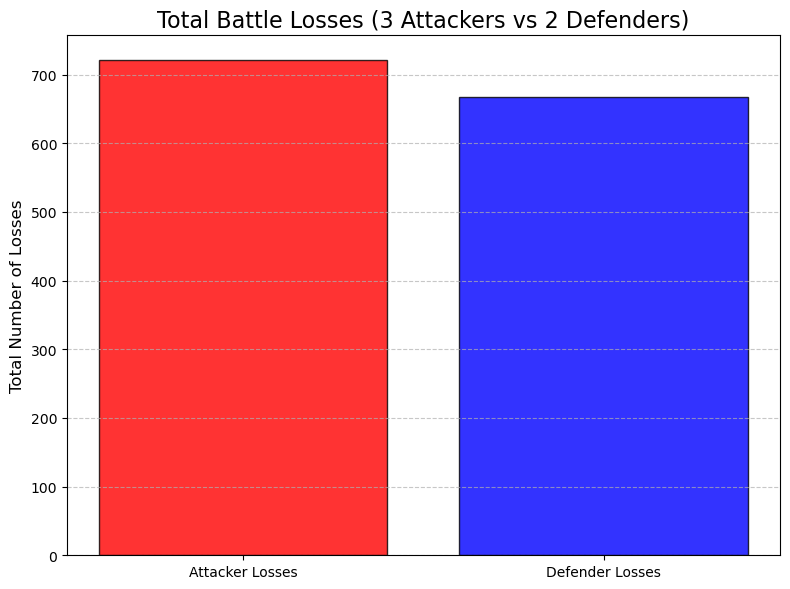

In [53]:
# Defining the barchart data
total_losses = [total_attacker_losses, total_defender_losses]

# Define labels and colors
labels = ['Attacker Losses', 'Defender Losses']
colors = ['red', 'blue']

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(labels, total_losses, color=colors,edgecolor='black', alpha=0.8)
plt.title('Total Battle Losses (3 Attackers vs 2 Defenders)', fontsize=16)
plt.ylabel('Total Number of Losses', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()